<a href="https://colab.research.google.com/github/Q-nicorn1/Q-nicorn1.github.io/blob/master/Naivebaye_XIE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Naïve Bayes Classifier is a probabilistic classifier and is based on Bayes Theorem.

Wisconsin Breast Cancer Dataset https://www.kaggle.com/priyanka841/breast-cancer-wisconsin 

Look at distribution of features and seee if normal/gausssian fits. If not -- what distribution should we use? 

Play with feature selection -- what features contribute to improvement and what don't? 

Use k-fold to validate


In [ ]:
from google.colab import drive
drive.mount('/data/')
data_dir = '/data/My Drive/EMSE 6575/NaiveBayesHomework'

Drive already mounted at /data/; to attempt to forcibly remount, call drive.mount("/data/", force_remount=True).


In [ ]:
#libraries
import pandas as pd
import numpy as np
from statistics import mean
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict, KFold
from sklearn.naive_bayes import GaussianNB

import sklearn.preprocessing
from sklearn.preprocessing import MinMaxScaler

In [ ]:
#read the data and clean the columns
data = pd.read_csv(data_dir + '/breast_cancer.csv')

data = data.drop(["id","Unnamed: 32"], axis = 1)

data.head(10)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,0.3345,0.8902,2.217,27.19,0.007510,0.03345,0.03672,0.01137,0.02165,0.005082,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,0.4467,0.7732,3.180,53.91,0.004314,0.01382,0.02254,0.01039,0.01369,0.002179,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,0.5835,1.3770,3.856,50.96,0.008805,0.03029,0.02488,0.01448,0.01486,0.005412,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,0.3063,1.0020,2.406,24.32,0.005731,0.03502,0.03553,0.01226,0.02143,0.003749,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,0.2976,1.5990,2.039,23.94,0.007149,0.07217,0.07743,0.01432,0.01789,0.010080,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


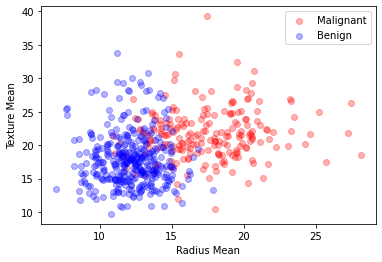

In [ ]:
#visualize how tumor types are grouped by different variables
B = data[data.diagnosis == "B"]
M = data[data.diagnosis == "M"]

plt.xlabel("Radius Mean")
plt.ylabel("Texture Mean")
plt.scatter(M.radius_mean, M.texture_mean, color = "red", label = "Malignant", alpha = 0.3)
plt.scatter(B.radius_mean, B.texture_mean, color = "blue", label = "Benign", alpha = 0.3)
plt.legend()
plt.show()

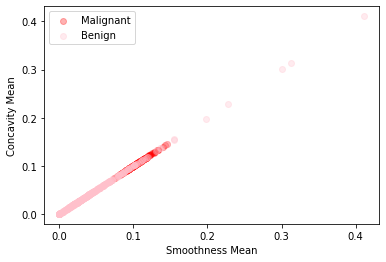

In [ ]:
plt.xlabel("Smoothness Mean")
plt.ylabel("Concavity Mean")
plt.scatter(M.smoothness_mean, M.smoothness_mean, color = "red", label = "Malignant", alpha = 0.3)
plt.scatter(B.concavity_mean, B.concavity_mean, color = "pink", label = "Benign", alpha = 0.3)

plt.legend()
plt.show()

In [ ]:
#through the visualization above, can tell some variables are correlated, so gonnal test out and then drop highly correlated(>0.8) variables
cor=data[['compactness_mean', 'concavity_mean', 'concave points_mean', 'smoothness_mean', 'radius_mean',	'texture_mean',	'perimeter_mean',	'area_mean', 'concave points_mean',	'symmetry_mean',	'fractal_dimension_mean']].corr()
cor

,compactness_mean,concavity_mean,concave points_mean,smoothness_mean,radius_mean,texture_mean,perimeter_mean,area_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
compactness_mean,1.000000,0.883121,0.831135,0.659123,0.506124,0.236702,0.556936,0.498502,0.831135,0.602641,0.565369
concavity_mean,0.883121,1.000000,0.921391,0.521984,0.676764,0.302418,0.716136,0.685983,0.921391,0.500667,0.336783
concave points_mean,0.831135,0.921391,1.000000,0.553695,0.822529,0.293464,0.850977,0.823269,1.000000,0.462497,0.166917
smoothness_mean,0.659123,0.521984,0.553695,1.000000,0.170581,-0.023389,0.207278,0.177028,0.553695,0.557775,0.584792
radius_mean,0.506124,0.676764,0.822529,0.170581,1.000000,0.323782,0.997855,0.987357,0.822529,0.147741,-0.311631
texture_mean,0.236702,0.302418,0.293464,-0.023389,0.323782,1.000000,0.329533,0.321086,0.293464,0.071401,-0.076437
perimeter_mean,0.556936,0.716136,0.850977,0.207278,0.997855,0.329533,1.000000,0.986507,0.850977,0.183027,-0.261477
area_mean,0.498502,0.685983,0.823269,0.177028,0.987357,0.321086,0.986507,1.000000,0.823269,0.151293,-0.283110
concave points_mean,0.831135,0.921391,1.000000,0.553695,0.822529,0.293464,0.850977,0.823269,1.000000,0.462497,0.166917
symmetry_mean,0.602641,0.500667,0.462497,0.557775,0.147741,0.071401,0.183027,0.151293,0.462497,1.000000,0.479921


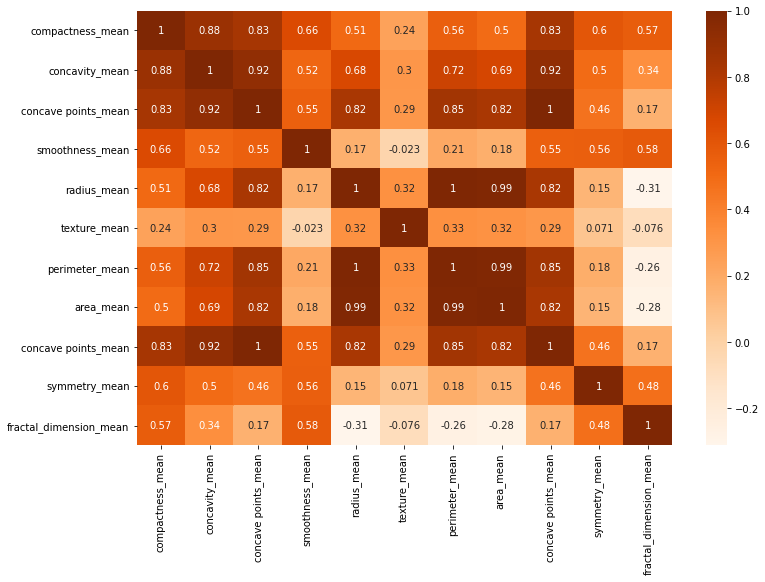

In [ ]:
#plot above results into heatmap so it's easier to spot corr that are >0.8
plt.figure(figsize = (12,8))

sns.heatmap(cor,annot = True , cmap = 'Oranges')

In [ ]:
#drop features 
data = data.drop(["concavity_mean", "concavity_se", "perimeter_mean", "perimeter_se", "area_mean", "area_se" ], axis = 1)

In [ ]:
#change 'diagnosis' to numerical  
diagnosis_map = {'M' : 1, 'B' : 0}
data['diagnosis'] = data['diagnosis'].map(diagnosis_map)


In [ ]:
x = data.drop(["diagnosis"], axis = 1)
y = data.diagnosis.values

#normalize feature values
X_norm = MinMaxScaler().fit_transform(x)
data = pd.DataFrame(X_norm,columns =x.columns)
 

In [ ]:
#Train model
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

modelnb = GaussianNB()
modelnb.fit(x_train, y_train)
y_pred=modelnb.predict(x_test)

#print(confusion_matrix(y_test, y_pred)) 
print("NB" ,end="  ")
print(modelnb.score(x_test,y_test))

NB  0.9473684210526315


In [ ]:
#evaluate the model

def eval_model(model, score_name, x, y):
  cv = KFold(n_splits=10) 
  accuracy = cross_val_score(model, x, y, scoring = 'accuracy', cv = cv)
  accuracy = list(accuracy)
  f1_scores = cross_val_score(model, x, y, scoring = 'f1', cv = cv)
  f1_scores = list(f1_scores)
  precision_scores = cross_val_score(model, x, y, scoring = 'precision', cv = cv)
  precision_scores = list(precision_scores)
  recall_scores = cross_val_score(model, x, y, scoring = 'recall', cv = cv)
  recall_scores = list(recall_scores)

  print(print_text) 
  print(mean(accuracy))
  print(mean(f1_scores))
  print(mean(precision_scores))
  print(mean(recall_scores))

eval_model(model = modelnb,  x = x, y = y, print_text="Naive Bayes")

Naive Bayes
0.9455200501253133
0.9188169194450456
0.9306410256410257
0.9092812079225123
